# The Nigerian Economic Data

Data Source: [World Bank](https://data.worldbank.org/country/NG)


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from numpy import median, mean, var, std, amax, amin

%matplotlib inline

load_ng_data = pd.read_csv("D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_data.csv")

## Reading the loaded Data

In [3]:
nigeria_data = load_ng_data

### Using the describe function for the descriptive summary of the Dataset

In [4]:
load_ng_data.describe()

,year,inflation,population,gdp,gdp_capita
count,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000
mean,1990.000000,15.785159,1.048739e+08,1.348217e+11,968.074458
std,17.752934,15.272901,4.711216e+07,1.614439e+11,876.055395
min,1960.000000,-3.726340,4.513846e+07,4.196092e+09,92.960466
25%,1975.000000,7.435345,6.337429e+07,2.775220e+10,321.320674
50%,1990.000000,11.709730,9.521245e+07,5.445784e+10,567.528649
75%,2005.000000,16.523540,1.388650e+08,1.760000e+11,1846.888095
max,2020.000000,72.835500,2.061396e+08,5.470000e+11,3100.820351


### Using the head function with 10 as parameter to display only values from the whole dataset


In [5]:
nigeria_data.head(10)

,year,inflation,population,gdp,gdp_capita
0,1960,5.444327,45138460,4.196092e+09,92.960466
1,1961,6.279147,46063570,4.467200e+09,96.979030
2,1962,5.265632,47029818,4.909303e+09,104.387028
3,1963,-2.694660,48032932,5.165489e+09,107.540573
4,1964,0.856793,49066762,5.552822e+09,113.168717
5,1965,4.103459,50127920,5.874423e+09,117.188635
6,1966,9.690346,51217969,6.366793e+09,124.307793
7,1967,-3.726340,52342231,5.203136e+09,99.406079
8,1968,-0.476060,53506201,5.200896e+09,97.201743
9,1969,10.155980,54717035,6.634187e+09,121.245373


## Heatmap Correlation Matrix 

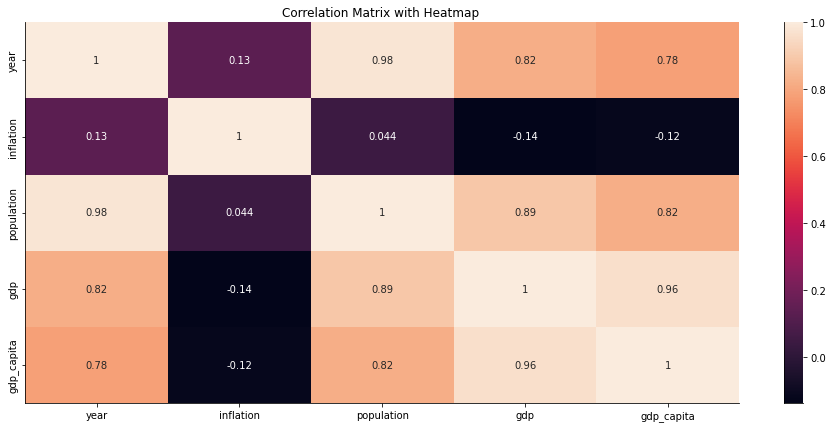

In [7]:
fig_dims = (16, 7)
fig, ax = plt.subplots(figsize=fig_dims)
heatmap = sns.heatmap(data=nigeria_data.corr(), annot=True, )
plt.title("Correlation Matrix with Heatmap ")
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_corr_matrix.png')
sns.despine()

### Describing the dataset column wise, starting with inflation

In [6]:
nigeria_data['inflation'].describe()

count    61.000000
mean     15.785159
std      15.272901
min      -3.726340
25%       7.435345
50%      11.709730
75%      16.523540
max      72.835500
Name: inflation, dtype: float64

## Inflation Column Box-Plot

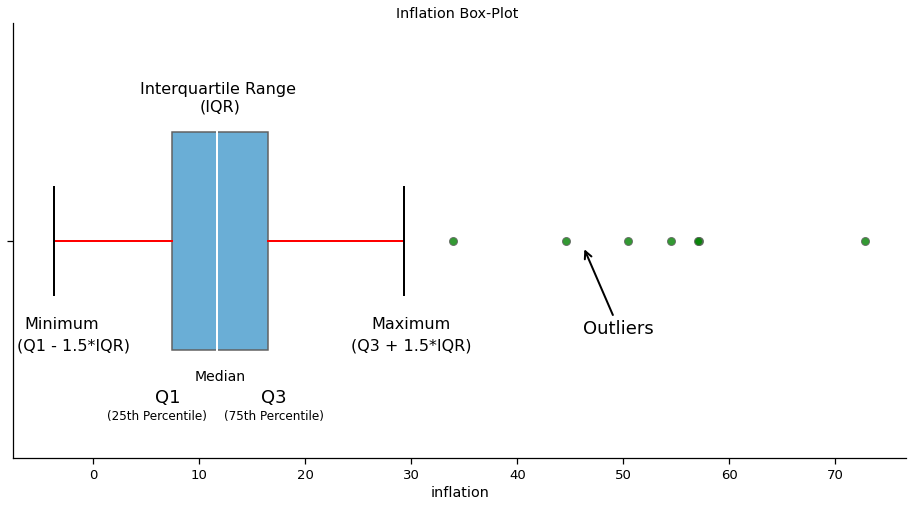

In [8]:
# boxplot for inflation
# some of the boxplot style influenced by https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/box_plot.ipynb
sns.set_context("notebook", font_scale=1.2)
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims, )
flierprops = dict(marker='o', markerfacecolor='green', markersize=8,
                  linestyle='none', alpha = .8)
capprops = dict(linestyle='-', linewidth=2, color='Black')
whiskerprops = dict(linestyle='-', linewidth=2, color='red')
medianprops = dict(linestyle='-', linewidth=2, color='White')
sns.boxplot(data=nigeria_data, x="inflation", width=.5, ax=ax, palette="Blues", 
            capprops=capprops, medianprops=medianprops,   whiskerprops=whiskerprops, flierprops=flierprops, 
            fliersize=10,  saturation=1, )
ax.text(12, .32, r"Median", horizontalalignment='center', fontsize=14)
ax.text(-1.9, .25, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
ax.text(17, .37, r"Q3", horizontalalignment='center', fontsize=18);
ax.text(7, .37, r"Q1", horizontalalignment='center', fontsize=18);
ax.text(17, .41, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
ax.text(6, .41, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
ax.text(30, .25, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);
ax.text(12, -.30, "Interquartile Range \n(IQR)", horizontalalignment='center', fontsize=16)
ax.text(30, .20, "Maximum", horizontalalignment='center', fontsize=16)
ax.text(-3, .20, "Minimum", horizontalalignment='center', fontsize=16)
ax.annotate('Outliers', xy=(46.25,0.015), xytext=(46.2,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center')
plt.title("Inflation Box-Plot ")
sns.despine()
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_inflation_boxplot.png')

## Inflation Distribution

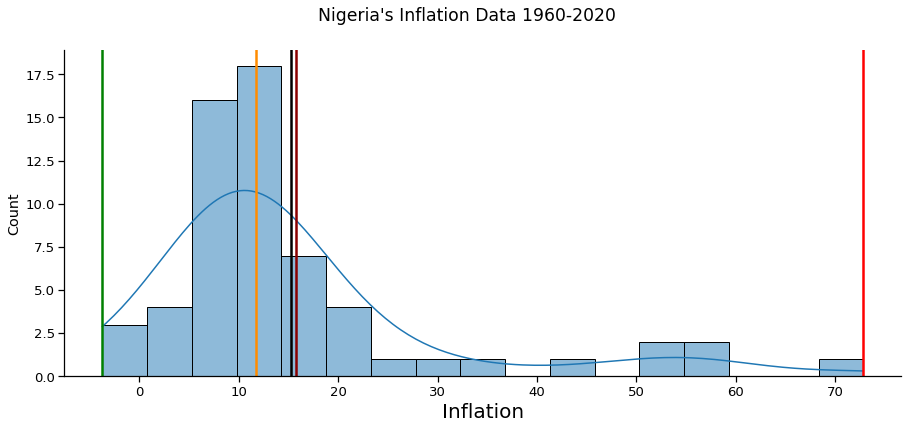

In [9]:
sns.set_context("notebook", font_scale=1.2)
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims, )
sns.histplot(data=nigeria_data, x="inflation",  palette="blues", kde=True, ax=ax, )
sns.despine()
plt.axvline(x=nigeria_data.inflation.mean(), color='darkred',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.inflation.median(), color='darkorange',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.inflation.std(), color='black',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.inflation.max(), color='red',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.inflation.min(), color='green',  ls='-', lw=2.5)
plt.suptitle("Nigeria's Inflation Data 1960-2020 ")
plt.xlabel("Inflation", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_inflation_describe.png')

## Regression Plot

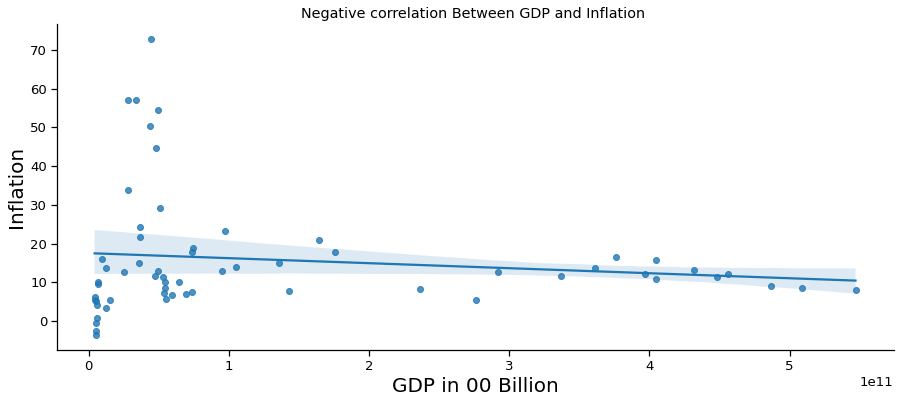

In [10]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
gdp = sns.regplot(data=nigeria_data, x="gdp", y="inflation", ax=ax, )
sns.despine()
plt.title("Negative correlation Between GDP and Inflation ")
plt.xlabel("GDP in 00 Billion", size=20)
plt.ylabel("Inflation", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_inflation_corr_gdp.png')

## We can see negative correlation between GDP and Inflation
## Because people consume less during high inflation which in effect the GDP will decline

### Statistical Description of GDP column

In [12]:
nigeria_data['gdp'].describe()

count    6.100000e+01
mean     1.348217e+11
std      1.614439e+11
min      4.196092e+09
25%      2.775220e+10
50%      5.445784e+10
75%      1.760000e+11
max      5.470000e+11
Name: gdp, dtype: float64

### GDP Box-Whisker plot

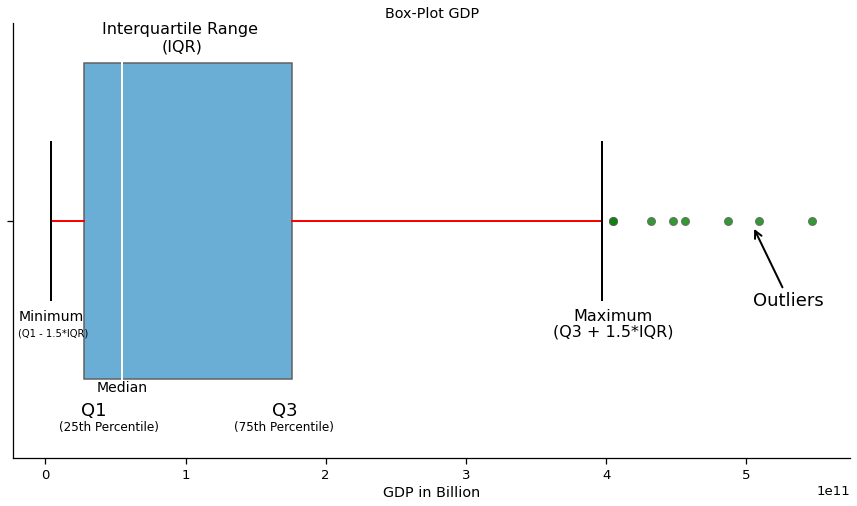

In [13]:
#boxplot for gdp
sns.set_context("notebook", font_scale=1.2)
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims, )
flierprops = dict(marker='o', markerfacecolor='green', markersize=8,
                  linestyle='none', alpha = .8)
capprops = dict(linestyle='-', linewidth=2, color='Black')
whiskerprops = dict(linestyle='-', linewidth=2, color='red')
sns.boxplot(data=nigeria_data, x="gdp", ax=ax, palette="Blues", 
            capprops=capprops, medianprops=medianprops, whiskerprops=whiskerprops, flierprops=flierprops, 
            fliersize=10,  saturation=1, )
ax.text(97794925815, -.43, "Interquartile Range \n(IQR)", horizontalalignment='center', fontsize=16)
ax.text(54530942680.5, .43, r"Median", horizontalalignment='center', fontsize=14)
plt.title("Box-Plot GDP")
ax.text(405000000000, .25, "Maximum", horizontalalignment='center', fontsize=16)
ax.text(405000000000, .29, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);
ax.text(4196092258, .25, "Minimum", horizontalalignment='center', fontsize=14)
ax.text(170530942680, .49, r"Q3", horizontalalignment='center', fontsize=18);
ax.text(34530942680.5, .49, r"Q1", horizontalalignment='center', fontsize=18);
ax.text(170530942680, .53, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
ax.text(45096092258, .53, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
plt.ylim(bottom=0.6)
plt.xlabel("GDP in Billion")
ax.text(5196092258, .29, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=10);
ax.annotate('Outliers', xy=(505000000000,0.015), xytext=(505000000000, 0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center')
sns.despine()
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_gdp_boxplot.png')

### GDP Positively skewed

### GDP Histogram

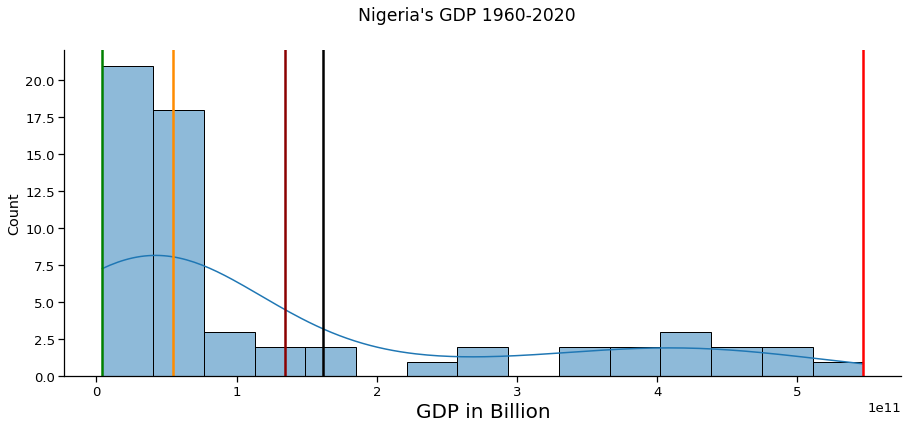

In [14]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=nigeria_data, x="gdp", palette="blues", kde=True, bins=15,  ax=ax, )
sns.despine()
plt.axvline(x=nigeria_data.gdp.mean(), color='darkred',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp.median(), color='darkorange',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp.std(), color='black',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp.max(), color='red',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp.min(), color='green',  ls='-', lw=2.5)

plt.suptitle("Nigeria's GDP 1960-2020 ")
plt.xlabel("GDP in Billion", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_gdp_describe.png')

## GDP regession with Population

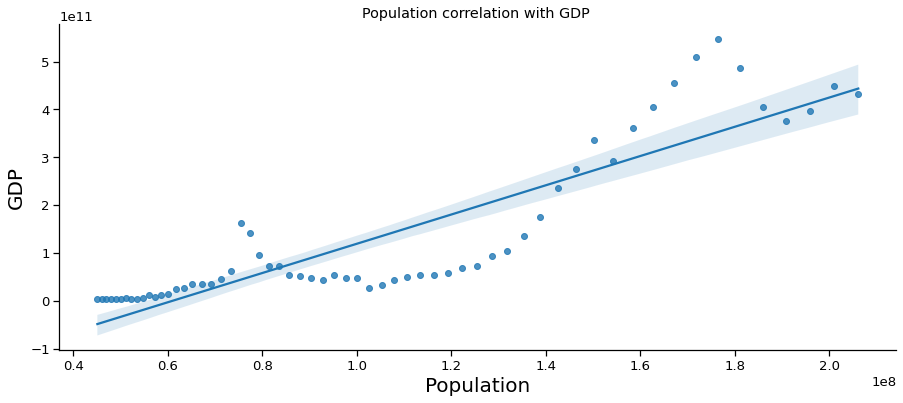

In [15]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
gdp = sns.regplot(data=nigeria_data, x="population", y="gdp",  ax=ax, )
sns.despine()
plt.title("Population correlation with GDP ")
plt.xlabel("Population", size=20)
plt.ylabel("GDP", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_population_gdp.png')

### The regression plot shows positive correlation between Population and GDP

## GDP per capita

In [16]:
nigeria_data['gdp_capita'].describe()

count      61.000000
mean      968.074458
std       876.055395
min        92.960466
25%       321.320674
50%       567.528649
75%      1846.888095
max      3100.820351
Name: gdp_capita, dtype: float64

### GDP per capita Box-Whisker plot

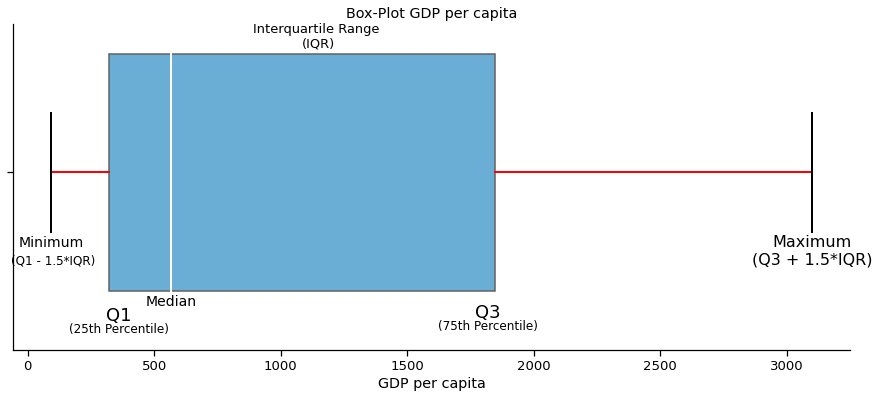

In [17]:
#boxplot for gdp per capita
sns.set_context("notebook", font_scale=1.2)
fig_dims = (15, 6)
flierprops = dict(marker='o', markerfacecolor='green', markersize=8,
                  linestyle='none', alpha = .8)
capprops = dict(linestyle='-', linewidth=2, color='Black')
whiskerprops = dict(linestyle='-', linewidth=2, color='red')
fig, ax = plt.subplots(figsize=fig_dims, )
sns.boxplot(data=nigeria_data, x="gdp_capita",  ax=ax, palette="Blues", 
            capprops=capprops, medianprops=medianprops, whiskerprops=whiskerprops, flierprops=flierprops, 
            fliersize=10,  saturation=1, )
ax.text(1150, -.42, "Interquartile Range \n(IQR)", horizontalalignment='center', fontsize=13)
ax.text(567.528649, .45, r"Median", horizontalalignment='center', fontsize=14)
plt.title("Box-Plot GDP per capita")
plt.xlabel("GDP per capita")
ax.text(3100.8203510000003, .25, "Maximum", horizontalalignment='center', fontsize=16)
ax.text(3100.8203510000003, .31, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16)
ax.text(92.96046559999999, .25, "Minimum", horizontalalignment='center', fontsize=14)
ax.text(100, .31, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=12)
ax.text(1820, .49, r"Q3", horizontalalignment='center', fontsize=18);
ax.text(360, .50, r"Q1", horizontalalignment='center', fontsize=18);
ax.text(1820, .53, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
ax.text(360, .54, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
plt.ylim(bottom=0.6)
sns.despine()
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_gdp_per_capita_boxplot.png')

### GDP per capita distribution

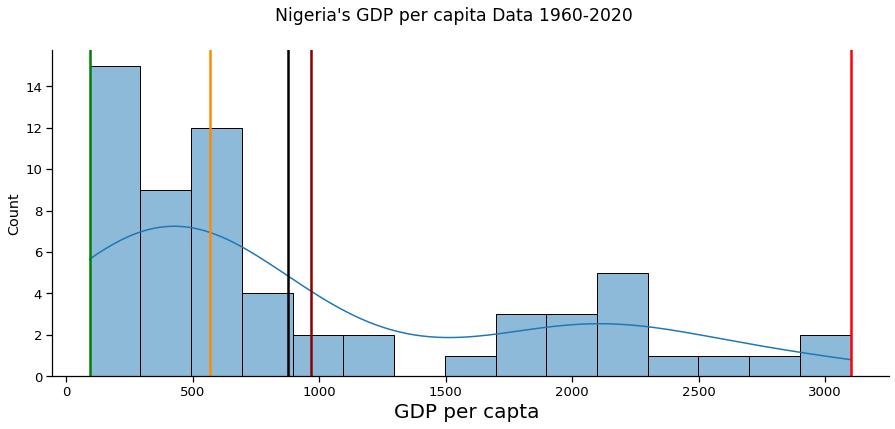

In [18]:
sns.set_context("notebook", font_scale=1.2)
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims, )
sns.histplot(data=nigeria_data, x="gdp_capita", palette="pastel", ax=ax,  bins=15, kde=True,  )
sns.despine()
plt.axvline(x=nigeria_data.gdp_capita.mean(), color='darkred',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp_capita.median(), color='darkorange',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp_capita.std(), color='black',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp_capita.max(), color='red',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.gdp_capita.min(), color='green',  ls='-', lw=2.5)
plt.suptitle("Nigeria's GDP per capita Data 1960-2020 ")
plt.xlabel("GDP per capta ", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_gdp_per_capita.png')

## GDP per capita regession with Population

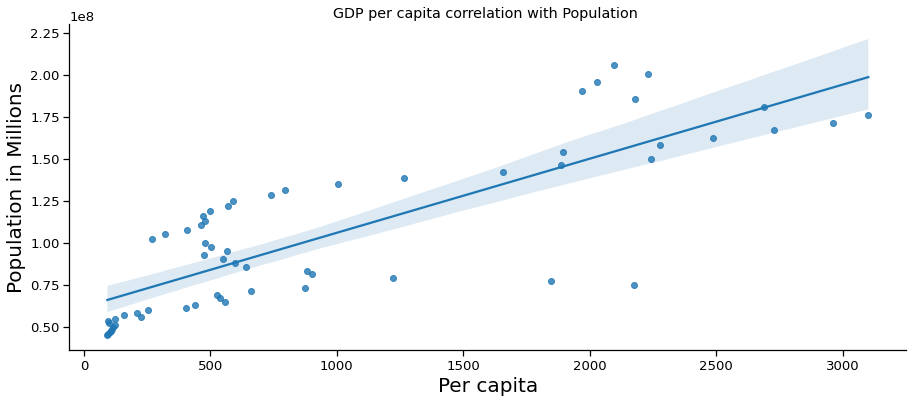

In [19]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
gdp = sns.regplot(data=nigeria_data, x="gdp_capita", y="population", ax=ax, )
sns.despine()
plt.title("GDP per capita correlation with Population ")
plt.xlabel("Per capita", size=20)
plt.ylabel("Population in Millions", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_gdp_per_capita_regplot.png')

### From the regression plot we can see the positive correlation between GDP per capita with population

### Time Seriess Analysis of GDP per capita from 1960 to 2020

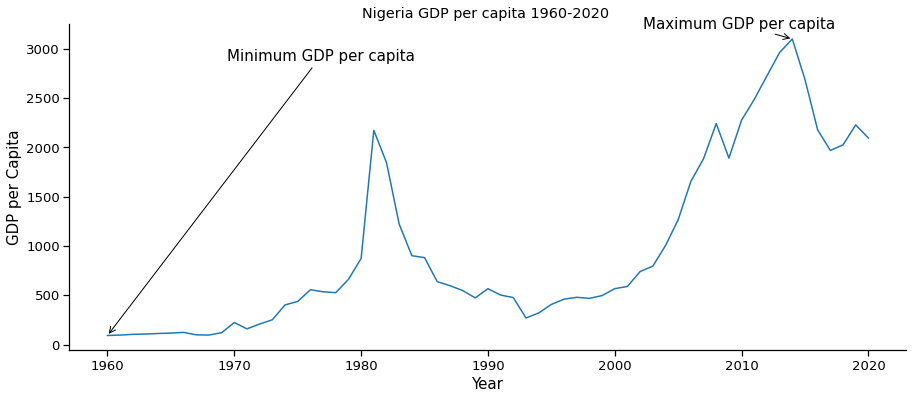

In [20]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
gdp = sns.lineplot(data=nigeria_data, x="year", y="gdp_capita", ax=ax)

ax.annotate('Maximum GDP per capita', (2014, 3100.82),
            xytext=(0.8, 1), textcoords='axes fraction', arrowprops=dict(arrowstyle='->', color='black'), ha='center',
            va='center',
            fontsize=15
            )
ax.annotate('Minimum GDP per capita', (1960, 92.96),
            xytext=(0.3, 0.9), textcoords='axes fraction', arrowprops=dict(arrowstyle='->', color='black'), ha='center',
            va='center',
            fontsize=15
            )
sns.despine()
plt.title("Nigeria GDP per capita 1960-2020 ")
plt.xlabel("Year", size=15)
plt.ylabel("GDP per Capita", size=15)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_per_capita.png')

### Nigeria in 1960 exports were mainly from farming, that might the reason the lower GDP per capita
### 2014 increase in GDP per capita can be attributed to high oil price, and the servic industries

## Population

In [21]:
nigeria_data['population'].describe()

count    6.100000e+01
mean     1.048739e+08
std      4.711216e+07
min      4.513846e+07
25%      6.337429e+07
50%      9.521245e+07
75%      1.388650e+08
max      2.061396e+08
Name: population, dtype: float64

## Box-Whisker plot Population

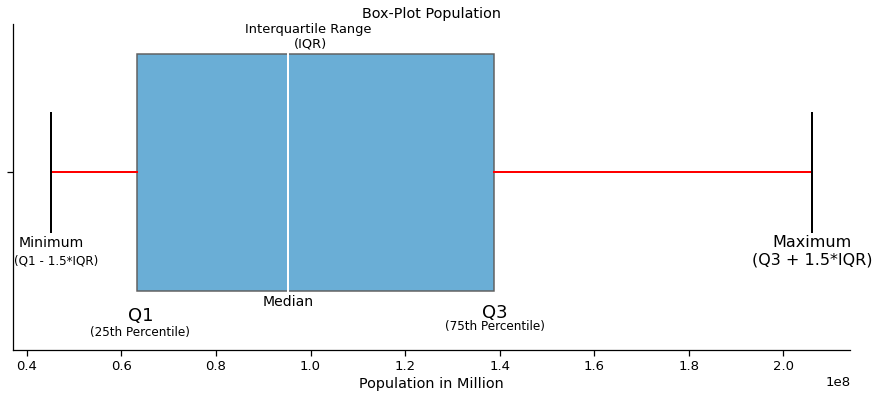

In [22]:
#boxplot for gdp population
sns.set_context("notebook", font_scale=1.2)
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims, )
flierprops = dict(marker='o', markerfacecolor='green', markersize=8,
                  linestyle='none', alpha = .8)
capprops = dict(linestyle='-', linewidth=2, color='Black')
whiskerprops = dict(linestyle='-', linewidth=2, color='red')
sns.boxplot(data=nigeria_data, x="population", ax=ax, palette="Blues", 
           capprops=capprops, medianprops=medianprops, whiskerprops=whiskerprops, flierprops=flierprops, 
            fliersize=10,  saturation=1, )
ax.text(100000000, -.42, "Interquartile Range \n(IQR)", horizontalalignment='center', fontsize=13)
ax.text(95212454, .45, r"Median", horizontalalignment='center', fontsize=14)
plt.title("Box-Plot Population")
plt.xlabel("Population in Million")
ax.text(206139587, .25, "Maximum", horizontalalignment='center', fontsize=16)
ax.text(206139587, .31, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16)
ax.text(45138460, .25, "Minimum", horizontalalignment='center', fontsize=14)
ax.text(46138460, .31, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=12)
ax.text(139000000, .49, r"Q3", horizontalalignment='center', fontsize=18);
ax.text(64000000, .50, r"Q1", horizontalalignment='center', fontsize=18);
ax.text(139000000, .53, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
ax.text(64000000, .55, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
plt.ylim(bottom=0.6)
sns.despine()
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_population_box-whisker.png')

### Distribution of Population Column

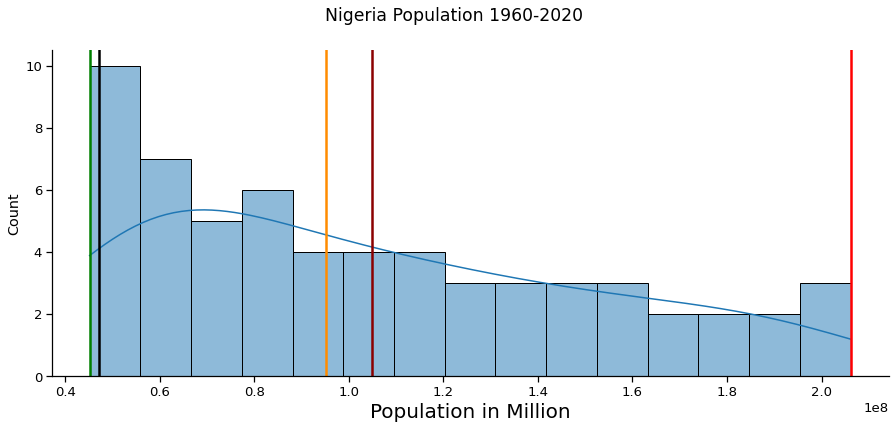

In [23]:
sns.set_context("notebook", font_scale=1.2)
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=nigeria_data, x="population", palette="pastel", ax=ax, bins=15, kde=True)
sns.despine()
plt.axvline(x=nigeria_data.population.mean(), color='darkred',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.population.median(), color='darkorange',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.population.std(), color='black',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.population.max(), color='red',  ls='-', lw=2.5)
plt.axvline(x=nigeria_data.population.min(), color='green',  ls='-', lw=2.5)
plt.suptitle("Nigeria Population 1960-2020 ")
plt.xlabel("Population in Million", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_population.png')

### Population increase over time

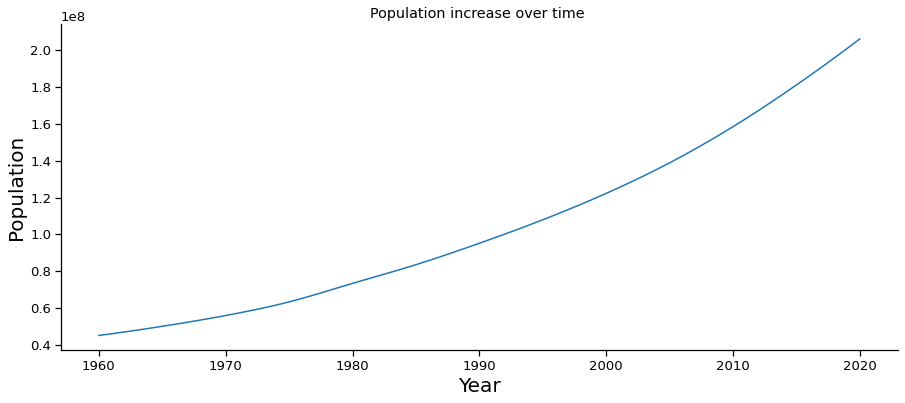

In [24]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
gdp = sns.lineplot(data=nigeria_data, x="year", y="population", ax=ax, )
sns.despine()
plt.title("Population increase over time ")
plt.xlabel("Year", size=20)
plt.ylabel("Population", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_population_growth.png')

### Regression between  year and population

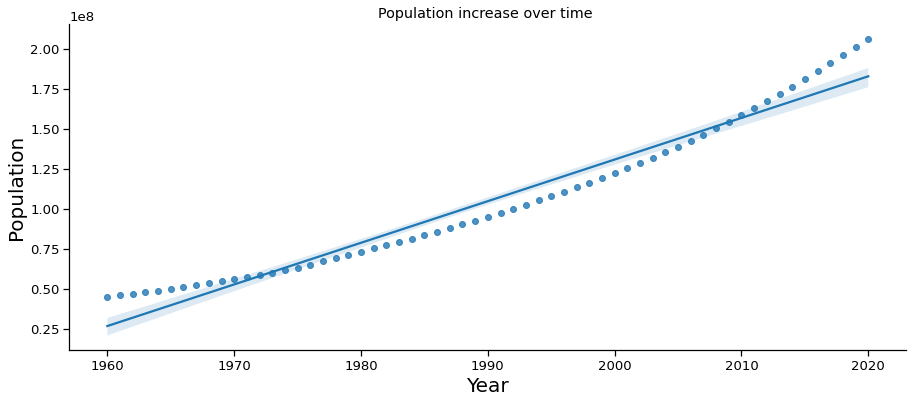

In [25]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
gdp = sns.regplot(data=nigeria_data, x="year", y="population", ax=ax, )
sns.despine()
plt.title("Population increase over time ")
plt.xlabel("Year", size=20)
plt.ylabel("Population", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/nigeria_population_reg.png')

### Population and inflation regression 

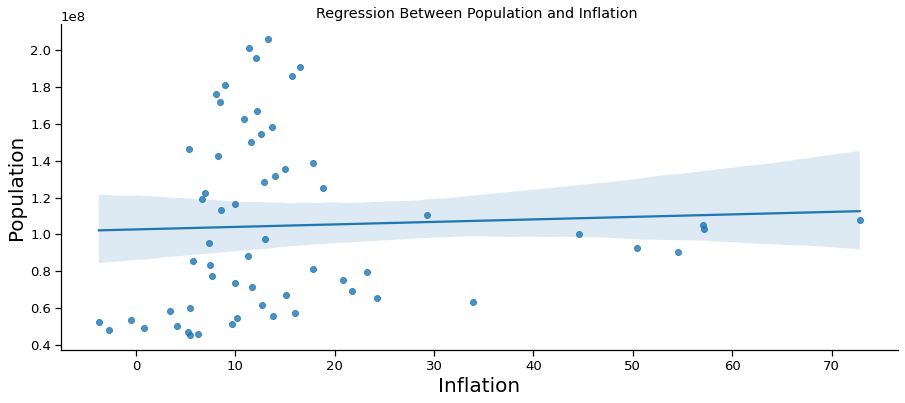

In [27]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
gdp = sns.regplot(data=nigeria_data, x="inflation", y="population", ax=ax, )
sns.despine()
plt.title("Regression Between Population and Inflation ")
plt.xlabel("Inflation", size=20)
plt.ylabel("Population", size=20)
plt.savefig('D:/IU/Semester 4/Exploratory Data Analysis and Visualization/population_corr_inflation.png')